# PROJEKT 2 - ANALIZA OBRAZÓW DNA OKA (SEGMENTACJA OBRAZU)

Celem projektu jest stworzenie systemu służącego do segmentacji (wykrywania) naczyń krwionośnych w obrazach dna oka oraz wykonanie eksperymentów weryfikujących jakość segmentacji.

![title](pictures/EYE.png)

Import wykorzystanych w projekcie bibliotek:

In [39]:
from pylab import *
from skimage import img_as_float,img_as_ubyte
from skimage.color import rgb2gray, grey2rgb,rgb2hsv
from skimage.filters import frangi, meijering, median
from skimage.morphology import disk, dilation, erosion, thin
from skimage.exposure import equalize_adapthist

In [40]:
folder = 'pictures/'
images = ['im0001', 'im0002', 'im0003', 'im0004', 'im0005', 'im0044', 'im0077', 'im0081', 'im0082', 'im0139', 'im0162', 'im0163', 'im0235', 'im0236', 'im0239', 'im0240', 'im0255', 'im0291', 'im0319', 'im0324']
in_img = '.ppm'
out_img = '.ah.ppm'

Funkacja pomocnicza wyświetlająca pobrany jako argument obraz w odpowiednim miejscu:

In [41]:
def show_image(image, position):
    subplot(position[0], position[1], position[2])
    plt.axis('off')
    plt.imshow(image, cmap='gray')

Funkcja przetwarzająca obraz wejściowy w celu wyodrębnienia naczyń krwionośnych:

In [42]:
def process_image(image):
    
    image = img_as_float(image)
    
    mask = rgb2gray(image)
    mask[mask > 0.15] = 1
    mask[mask <= 0.15] = 0
    mask = -mask
    mask = erosion(mask, disk(1))
    mask = dilation(mask, disk(5))
    mask = erosion(mask, disk(3))
    
    image = image[:,:,1]
    image = equalize_adapthist(image, clip_limit=0.02)
    image = meijering(image)
    
    thin1 = erosion(image)
    thin1 = erosion(thin1)
    thin1[mask == 0] = 0

    thick = dilation(image)
    thick = dilation(thick)
    thick[mask == 0] = 0
    
    image = thin1*thick
    image = equalize_adapthist(image, clip_limit=0.01)
    
    image[image > 0.15] = 1
    image[image <= 0.15] = 0
    
    image = median(image)
    
    image = thin(image, max_iter=3)
    image = dilation(dilation(image))
    
    return image

In [87]:
def diffrence(pr_image,out_image):
    rgb_pr=img_as_float(grey2rgb(pr_image))
    rgb_out=img_as_float(grey2rgb(out_image))
    result=rgb_pr.copy()
    true_positives=0.0
    false_positives=0.0
    true_negatives=0.0
    false_negatives=0.0
    for x in range(len(rgb_pr)):
        for y in range(len(rgb_pr[0])):
            if (np.array_equal([0,0,0],rgb_pr[x][y]) and not (np.array_equal(rgb_pr[x][y],rgb_out[x][y]))):
                result[x][y]=[1,0,0]
                false_negatives+=1
            elif(np.array_equal([1,1,1],rgb_pr[x][y]) and not (np.array_equal(rgb_pr[x][y],rgb_out[x][y]))):
                result[x][y]=[0,1,0]
                false_positives+=1
            elif(np.array_equal([1,1,1],rgb_pr[x][y])):
                true_positives+=1
            else:
                true_negatives+=1
    sensitivity=true_positives/(true_positives+false_negatives)  
    accuracy=(true_positives + true_negatives)/(true_positives + true_negatives + false_positives + false_negatives)
    specificity=true_negatives/(false_positives+true_negatives) 
    return result,sensitivity,accuracy,specificity

sensitivity 0.7227541910963142
accuracy 0.9362573789846517
specificity 0.9548592125968082
sensitivity 0.72819863988613
accuracy 0.9484155844155844
specificity 0.9661814052591959
sensitivity 0.7796157310117082
accuracy 0.9334757969303424
specificity 0.94661062559266
sensitivity 0.6642478462557986
accuracy 0.944047225501771
specificity 0.9655166276822943
sensitivity 0.7790601813685079
accuracy 0.9520401416765053
specificity 0.9665386219798388
sensitivity 0.7344617319734216
accuracy 0.9298512396694215
specificity 0.9483186837895324
sensitivity 0.571075087297366
accuracy 0.9296056670602125
specificity 0.9703779286114391


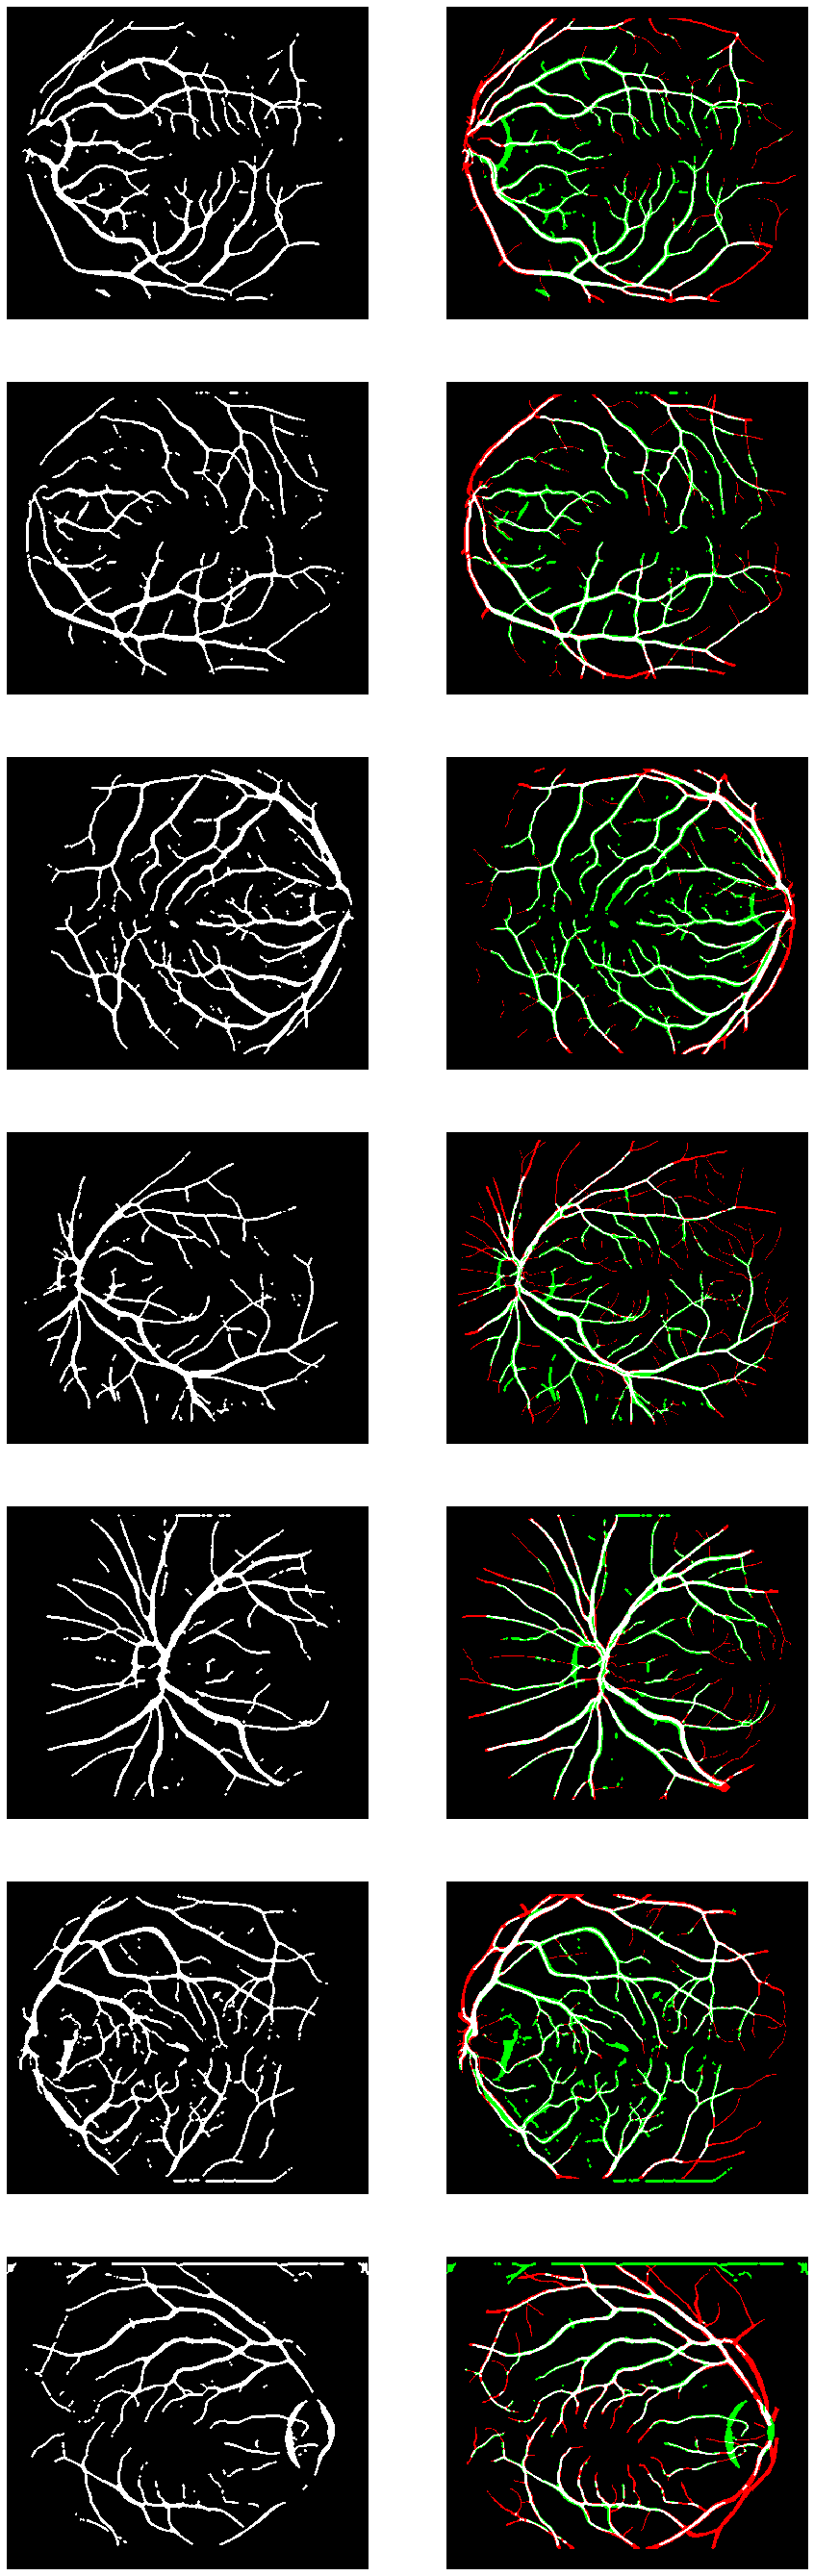

avgsensitivity 0.7113447726984639
avgspecificity 0.9597718722159669


In [89]:
images = ['im0077', 'im0081', 'im0082', 'im0162', 'im0163', 'im0239', 'im0240']

columns = 2
rows = len(images)
fig=plt.figure(figsize=(15, rows * 7))
avgsensitivity=0.0
avgspecificity=0.0
for img in range(rows):
    
    original_image = plt.imread(folder + images[img] + in_img)
    
    processed_image = process_image(original_image)
    show_image(processed_image, [rows, columns, img*columns + 1])
    
    out_image = plt.imread(folder + images[img] + out_img)
    difi_image,sensitivity,accuracy,specificity=diffrence(processed_image,out_image)
    show_image(difi_image, [rows, columns, img*columns + 2])
    print("sensitivity",sensitivity)
    print("accuracy",accuracy)
    print("specificity",specificity)
    avgsensitivity+=sensitivity
    avgspecificity+=specificity
plt.show()
avgsensitivity=avgsensitivity/rows
print("avgsensitivity",avgsensitivity)
avgspecificity=avgspecificity/rows
print("avgspecificity",avgspecificity)

